# Tamas Flesch Thesis - Database insight step

This notebook is about to investigate the database, what are the key factors in the data, what are the distributions of the columns and so on.

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm

In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [7]:
# Importing all datasets
futbin_data = pd.read_csv("futbin24.csv")
futbin_data.head()

,Name,Rating,Price,Skills_Star,Weak_Foot_Star,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defense / Speed,Physical / Positioning,Popularity,Base_Stats,Ingame_Stats,Height_in_cm,BodyType_Weight,Club_Hero,Alt_Pos_Count,Main_Position_CB,Main_Position_CDM,Main_Position_CF,Main_Position_CM,Main_Position_GK,Main_Position_LB,Main_Position_LM,Main_Position_LW,Main_Position_LWB,Main_Position_RB,Main_Position_RM,Main_Position_RW,Main_Position_RWB,Main_Position_ST,Run_Style_Controlled Explosive,Run_Style_Controlled Lengthy,Run_Style_Explosive,Run_Style_Lengthy,Run_Style_Mostly Explosive,Run_Style_Mostly Lengthy,Attack_Workrate_L,Attack_Workrate_M,Defense_Workrate_L,Defense_Workrate_M,BodyType_Text_Avg & Normal,BodyType_Text_Avg & Stocky,BodyType_Text_CR7,BodyType_Text_Courtois,BodyType_Text_Messi,BodyType_Text_Neymar,BodyType_Text_R9,BodyType_Text_Ronaldinho,BodyType_Text_Salah,BodyType_Text_Shaqiri,BodyType_Text_Short & Lean,BodyType_Text_Short & Normal,BodyType_Text_Short & Stocky,BodyType_Text_Tall & Lean,BodyType_Text_Tall & Normal,BodyType_Text_Tall & Stocky,BodyType_Text_Unique,League_Cat_Icons,League_Cat_LALIGA EA SPORTS,League_Cat_Ligue 1 Uber Eats,League_Cat_MLS,League_Cat_Other,League_Cat_Premier League,League_Cat_Serie A TIM,Nation_Cat_Brazil,Nation_Cat_England,Nation_Cat_France,Nation_Cat_Germany,Nation_Cat_Holland,Nation_Cat_Italy,Nation_Cat_Other,Nation_Cat_Portugal,Nation_Cat_Spain,Nation_Cat_United States,Alt_Pos_1_CB,Alt_Pos_1_CDM,Alt_Pos_1_CF,Alt_Pos_1_CM,Alt_Pos_1_LB,Alt_Pos_1_LM,Alt_Pos_1_LW,Alt_Pos_1_LWB,Alt_Pos_1_RB,Alt_Pos_1_RM,Alt_Pos_1_RW,Alt_Pos_1_RWB,Alt_Pos_1_ST,Alt_Pos_1_missing,Alt_Pos_2_CB,Alt_Pos_2_CDM,Alt_Pos_2_CF,Alt_Pos_2_CM,Alt_Pos_2_LB,Alt_Pos_2_LM,Alt_Pos_2_LW,Alt_Pos_2_LWB,Alt_Pos_2_RB,Alt_Pos_2_RM,Alt_Pos_2_RW,Alt_Pos_2_ST,Alt_Pos_2_missing,Alt_Pos_3_CDM,Alt_Pos_3_CF,Alt_Pos_3_CM,Alt_Pos_3_LB,Alt_Pos_3_LM,Alt_Pos_3_LW,Alt_Pos_3_LWB,Alt_Pos_3_RM,Alt_Pos_3_RW,Alt_Pos_3_ST,Alt_Pos_3_missing,Gender_Male
0,Erling Haaland,97,1980000.0,4,5,96.0,98,80,91,56,97,1645,518,2481,195,94,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1
1,Kylian Mbappé,97,6250000.0,5,4,99.0,96,88,97,47,88,1651,515,2465,182,75,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,Lionel Messi,97,2830000.0,5,4,91.0,96,97,98,40,77,-4941,499,2430,169,67,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,Pelé,97,6400000.0,5,5,95.0,96,92,96,60,81,272,520,2532,173,70,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
4,Johan Cruyff,97,3550000.0,5,5,93.0,95,93,97,50,80,159,508,2460,180,71,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1


In [5]:
futbin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22581 entries, 0 to 22580
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    22581 non-null  object 
 1   Club                    22581 non-null  object 
 2   Nation                  22581 non-null  object 
 3   League                  22581 non-null  object 
 4   Rating                  22581 non-null  int64  
 5   Main_Position           22581 non-null  object 
 6   Alternate_Positions     22581 non-null  object 
 7   Card_Version            22581 non-null  object 
 8   Run_Style               22581 non-null  object 
 9   Price                   22581 non-null  float64
 10  Price_Variation         22581 non-null  object 
 11  Skills_Star             22581 non-null  int64  
 12  Weak_Foot_Star          22581 non-null  int64  
 13  Attack_Workrate         22581 non-null  object 
 14  Defense_Workrate        22581 non-null

<Axes: >

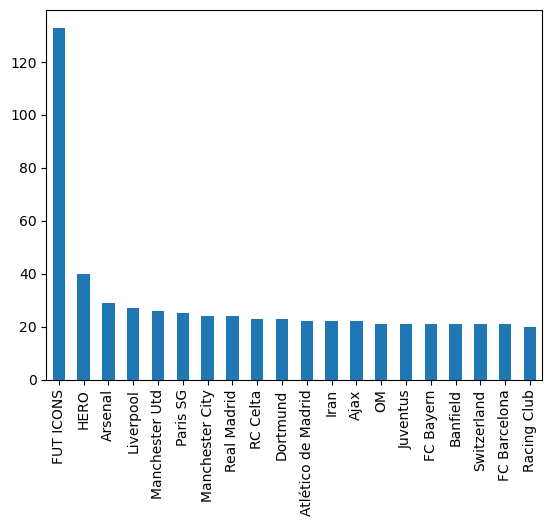

In [21]:
futbin_data.Club.value_counts().nlargest(20).plot(kind='bar')

In [23]:
futbin_data.Club.value_counts().count()

677

In [24]:
futbin_data.Nation.value_counts().count()

134

<Axes: >

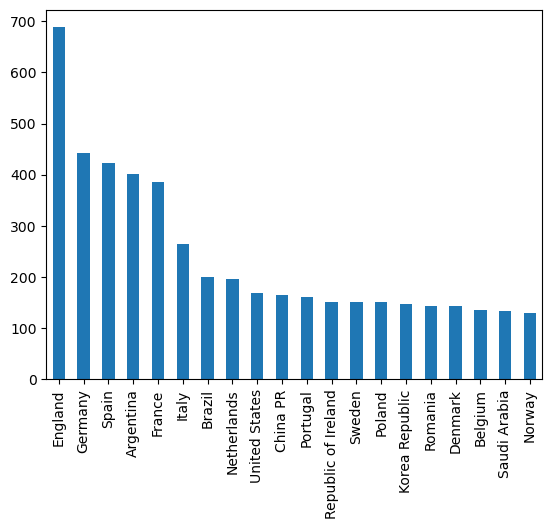

In [27]:
futbin_data.Nation.value_counts().nlargest(20).plot(kind='bar')

In [28]:
futbin_data.League.value_counts().count()

48

<Axes: >

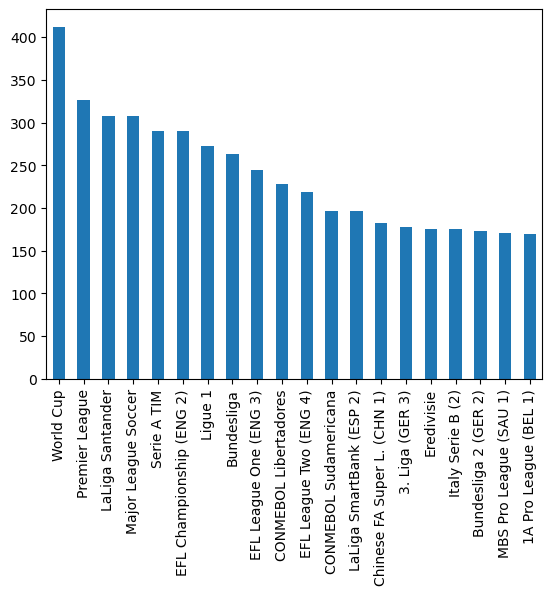

In [29]:
futbin_data.League.value_counts().nlargest(20).plot(kind='bar')

In [30]:
futbin_data.Rating.value_counts()

67    400
65    389
66    384
64    378
68    369
63    346
69    322
70    310
62    289
60    258
71    250
61    247
72    232
73    216
78    180
74    171
75    169
59    160
77    160
58    133
76    130
79    120
56    101
87     97
57     96
81     90
84     90
86     90
55     83
88     83
80     80
54     79
83     70
89     70
85     70
90     60
82     60
53     53
91     49
52     47
51     33
92     31
50     28
93     23
94     17
49     15
95     10
48     10
97      7
98      3
46      2
Name: Rating, dtype: int64

<Axes: ylabel='Density'>

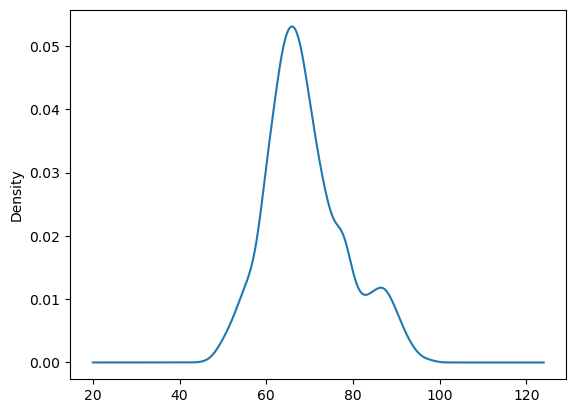

In [34]:
futbin_data['Rating'].plot(kind='kde')

In [36]:
futbin_data['Rating'].min()

46

In [37]:
futbin_data['Rating'].max()

98

In [39]:
futbin_data['Rating'].mean()

69.125

<Axes: >

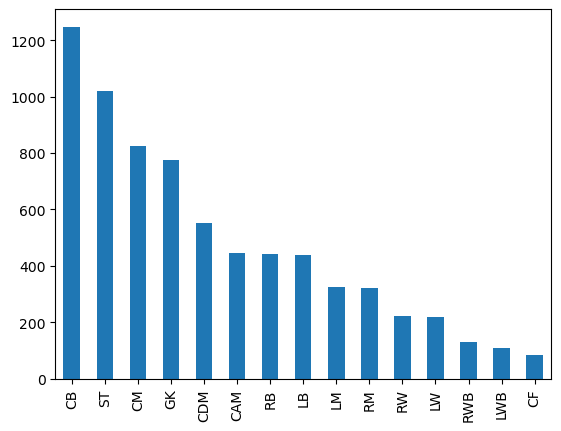

In [41]:
futbin_data.Main_Position.value_counts().plot(kind='bar')

In [43]:
futbin_data.Card_Version.value_counts().count()

131

In [44]:
futbin_data.Run_Style.value_counts().count()

3

In [45]:
futbin_data.Run_Style.value_counts()

Controlled    5079
Explosive     1102
Lengthy        979
Name: Run_Style, dtype: int64

<Axes: >

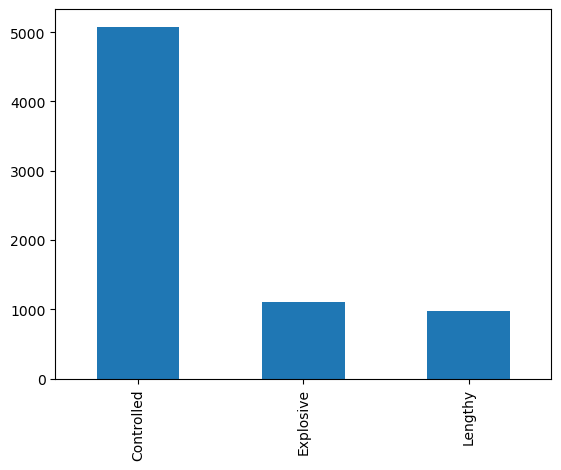

In [46]:
futbin_data.Run_Style.value_counts().plot(kind='bar')

<Axes: ylabel='Density'>

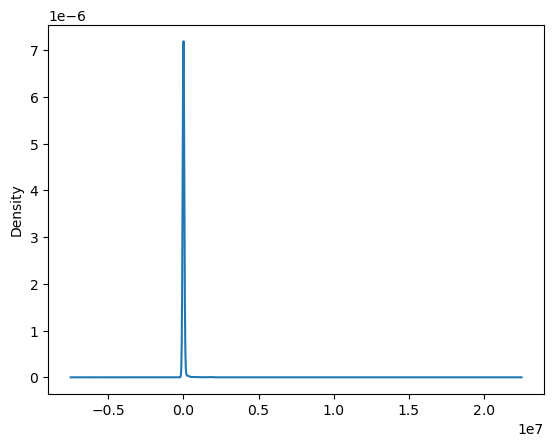

In [47]:
futbin_data['Price'].plot(kind='kde')

In [48]:
futbin_data['Price'].min()

0.0

In [50]:
futbin_data['Price'].max()

15000000.0

<Axes: >

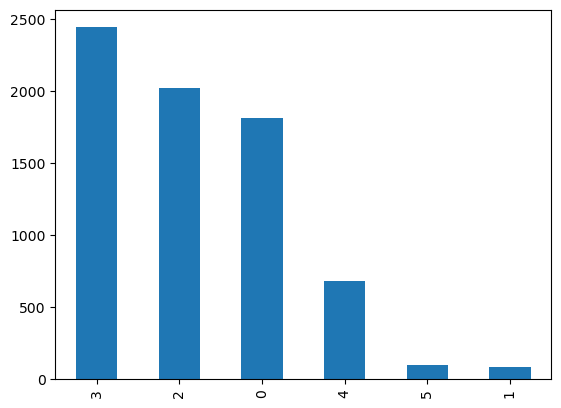

In [51]:
futbin_data.Skills_Star.value_counts().plot(kind='bar')

<Axes: >

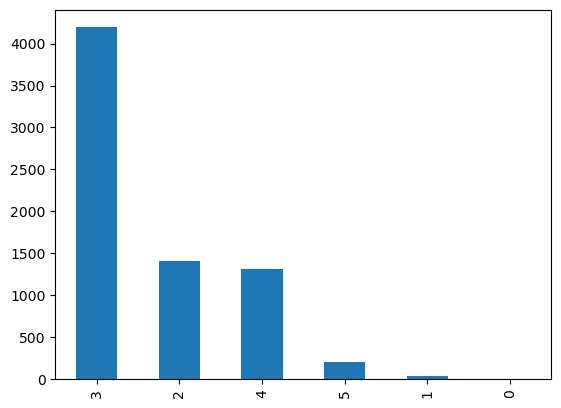

In [52]:
futbin_data.Weak_Foot_Star.value_counts().plot(kind='bar')

<Axes: >

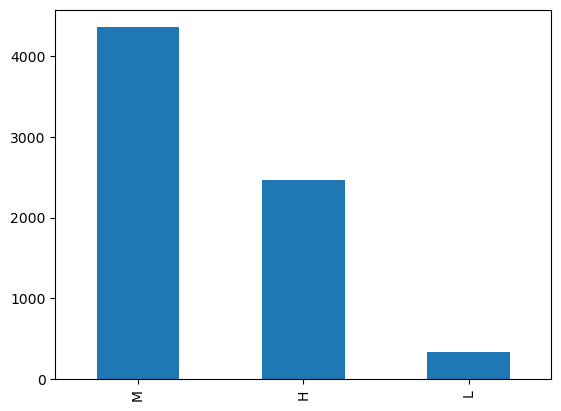

In [53]:
futbin_data.Attack_Workrate.value_counts().plot(kind='bar')

In [8]:
futbin_data.Defense_Workrate.value_counts().plot(kind='bar')

AttributeError: 'DataFrame' object has no attribute 'Defense_Workrate'

<Axes: >

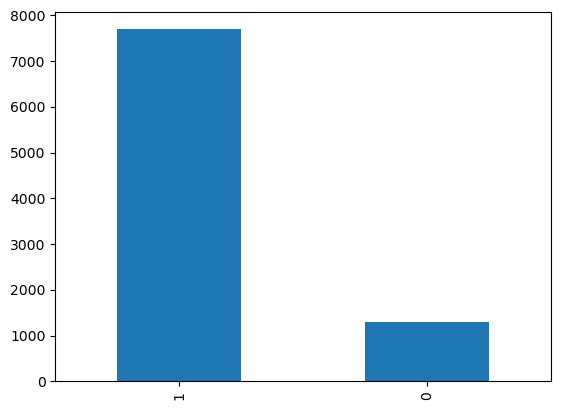

In [10]:
futbin_data.Gender_Male.value_counts().plot(kind='bar')

In [69]:
pd.DataFrame(futbin_data[['Pace / Diving','Shooting / Handling','Passing / Kicking','Dribbling / Reflexes','Defense / Speed','Physical / Positioning']].mean())

,0
Pace / Diving,70.463547
Shooting / Handling,57.305726
Passing / Kicking,61.458101
Dribbling / Reflexes,66.473184
Defense / Speed,52.562989
Physical / Positioning,67.448883


In [70]:
pd.DataFrame(futbin_data[['Pace / Diving','Shooting / Handling','Passing / Kicking','Dribbling / Reflexes','Defense / Speed','Physical / Positioning']].min())

,0
Pace / Diving,30.0
Shooting / Handling,18.0
Passing / Kicking,26.0
Dribbling / Reflexes,28.0
Defense / Speed,15.0
Physical / Positioning,30.0


In [71]:
pd.DataFrame(futbin_data[['Pace / Diving','Shooting / Handling','Passing / Kicking','Dribbling / Reflexes','Defense / Speed','Physical / Positioning']].max())

,0
Pace / Diving,99.0
Shooting / Handling,98.0
Passing / Kicking,99.0
Dribbling / Reflexes,99.0
Defense / Speed,97.0
Physical / Positioning,99.0


<Axes: ylabel='Density'>

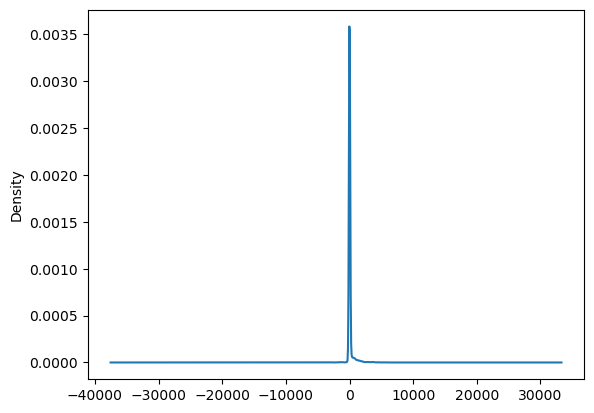

In [72]:
futbin_data['Popularity'].plot(kind='kde')

In [76]:
futbin_data['Popularity'].plot(kind='kde')

15590